In [9]:
import json

import matplotlib.pyplot as plt 
import scipy.misc
import numpy as np
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, Cropping2D
from keras.layers import MaxPooling2D, ZeroPadding2D, BatchNormalization, Activation
from keras.models import Model
from keras.utils.layer_utils import print_summary
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

from keras import __version__ as kv
from scipy import __version__ as sv
from matplotlib import __version__ as mv
from numpy import __version__ as nv

print kv
print sv
print mv
print nv

2.0.5
0.19.1
2.0.0
1.13.0


In [2]:
# Local files
import utils
reload(utils)

<module 'utils' from 'utils.pyc'>

# Data

### Config

In [3]:
trained_model_dir = '/home/ubuntu/data/sar/experiment_crops_20170809/' \
'1.1-as_kd-best_baseline_and_distance_from_land_features/trained_models/'

In [4]:
train_dir = '/home/ubuntu/data/sar/experiment_crops_20170809/train/'
valid_dir = '/home/ubuntu/data/sar/experiment_crops_20170809/validate/'

In [5]:
input_shape = (50, 50, 1)
num_classes = 3

### Convert tif2png

Done in 1.0-as_kd-baseline-simple_CNN_from_scratch.ipynb

### Create Multi-input data (pixel  and distance from land)

To allign with features with images, we use shuffle=False:

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=20,
        shuffle=False,
        class_mode='categorical', 
        color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=10,
        class_mode='categorical',
        color_mode='grayscale')

Found 2000 images belonging to 3 classes.
Found 500 images belonging to 3 classes.


In [15]:
train_generator.filenames

['oil_and_gas_infrastructure/S1A_IW_GRDH_1SDV_20170518T055805_20170518T055830_016632_01B98C_F4FB_terrain_correction_7.png',
 'oil_and_gas_infrastructure/S1A_IW_GRDH_1SDV_20161019T060558_20161019T060623_013555_015B30_0BEA_terrain_correction_46.png',
 'oil_and_gas_infrastructure/S1A_IW_GRDH_1SDV_20161019T060558_20161019T060623_013555_015B30_0BEA_terrain_correction_37.png',
 'oil_and_gas_infrastructure/S1B_IW_GRDH_1SDV_20170520T062751_20170520T062816_005678_009F22_ED54_subset4_0.png',
 'oil_and_gas_infrastructure/S1A_IW_GRDH_1SDV_20170519T174957_20170519T175022_016654_01BA3E_E066_terrain_correction_0.png',
 'oil_and_gas_infrastructure/S1B_IW_GRDH_1SDV_20161018T061202_20161018T061227_002557_00451E_9935_terrain_correction_2.png',
 'oil_and_gas_infrastructure/S1B_IW_GRDH_1SDV_20170418T055653_20170418T055718_005211_0091ED_93BE_terrain_correction_36.png',
 'oil_and_gas_infrastructure/S1A_IW_GRDH_1SDV_20170219T174123_20170219T174148_015356_019304_B08A_terrain_correction_56.png',
 'oil_and_gas_i

In [ ]:
"In fact, we may be able to get "

Following the "Multi-input" section of: https://github.com/asmith26/courses/blob/master/deeplearning1/nbs/lesson7.ipynb

In [11]:
with open(train_dir + "oil_and_gas_infrastructure_train.json") as json_data:
    distances_train_oil = json.load(json_data)

with open(train_dir + "other_train.json") as json_data:
    distances_train_other = json.load(json_data)

with open(train_dir + "turbine_train.json") as json_data:
    distances_train_turbine = json.load(json_data)
    
    
with open(valid_dir + "oil_and_gas_infrastructure_validate.json") as json_data:
    distances_valid_oil = json.load(json_data)

with open(valid_dir + "other_validate.json") as json_data:
    distances_valid_other = json.load(json_data)
          
with open(valid_dir + "turbine_validate.json") as json_data:
    distances_valid_turbine = json.load(json_data)

In [12]:
distances_train_oil

{u'S1A_IW_GRDH_1SDV_20160916T062829_20160916T062854_013074_014BBB_5560_terrain_correction_2.tif': {u'distance to land': 188.94971047866872},
 u'S1A_IW_GRDH_1SDV_20160916T062829_20160916T062854_013074_014BBB_5560_terrain_correction_4.tif': {u'distance to land': 84.21906946463032},
 u'S1A_IW_GRDH_1SDV_20160916T062919_20160916T062944_013074_014BBB_C1EF_terrain_correction_0.tif': {u'distance to land': 108.97143682228057},
 u'S1A_IW_GRDH_1SDV_20160916T062919_20160916T062944_013074_014BBB_C1EF_terrain_correction_1.tif': {u'distance to land': 95.87639353195213},
 u'S1A_IW_GRDH_1SDV_20160916T062919_20160916T062944_013074_014BBB_C1EF_terrain_correction_2.tif': {u'distance to land': 164.63099175129358},
 u'S1A_IW_GRDH_1SDV_20160916T062919_20160916T062944_013074_014BBB_C1EF_terrain_correction_3.tif': {u'distance to land': 191.6098198998539},
 u'S1A_IW_GRDH_1SDV_20160916T062919_20160916T062944_013074_014BBB_C1EF_terrain_correction_4.tif': {u'distance to land': 33.83624841041659},
 u'S1A_IW_GRDH_1S

In [ ]:
all_distances = []

In [82]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='categorical', 
        color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=10,
        class_mode='categorical',
        color_mode='grayscale')

Found 2000 images belonging to 3 classes.
Found 500 images belonging to 3 classes.


# Experiments

## simple/baseline model (3 layers, no regularisation)

In [94]:
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(outputs=x, inputs=classifier_input)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [95]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
__________

In [96]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)

In [97]:
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 10s - loss: 0.4741 - acc: 0.8045 - val_loss: 0.3356 - val_acc: 0.8700
Epoch 2/2
100/100 [==============================] - 10s - loss: 0.3030 - acc: 0.8765 - val_loss: 0.2487 - val_acc: 0.9033


In [98]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 10s - loss: 0.2287 - acc: 0.9160 - val_loss: 0.1770 - val_acc: 0.9417
Epoch 2/2
100/100 [==============================] - 10s - loss: 0.1776 - acc: 0.9360 - val_loss: 0.1926 - val_acc: 0.9283


In [99]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 10s - loss: 0.1307 - acc: 0.9515 - val_loss: 0.2283 - val_acc: 0.9200
Epoch 2/2
100/100 [==============================] - 10s - loss: 0.1257 - acc: 0.9500 - val_loss: 0.1804 - val_acc: 0.9400


In [100]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 10s - loss: 0.0645 - acc: 0.9790 - val_loss: 0.1601 - val_acc: 0.9467
Epoch 2/2
100/100 [==============================] - 10s - loss: 0.0495 - acc: 0.9870 - val_loss: 0.1444 - val_acc: 0.9533


In [101]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 10s - loss: 0.0487 - acc: 0.9850 - val_loss: 0.1798 - val_acc: 0.9333
Epoch 2/2
100/100 [==============================] - 10s - loss: 0.0509 - acc: 0.9850 - val_loss: 0.1527 - val_acc: 0.9467


In [167]:
model.save_weights(trained_model_dir + "simple_model_valAcc94.h5")

### Lets visualise and evaluate/plot predictions

In [124]:
validation_generator.reset()

In [125]:
preds = model.predict_generator(validation_generator,50)
preds.shape

(500, 3)

In [154]:
from sklearn.metrics import confusion_matrix

In [120]:
sorted(list(validation_generator.class_indices))

['oil_and_gas_infrastructure', 'other', 'turbine']

In [140]:
y_pred = np.argmax(preds, axis=1)

In [158]:
y_true = validation_generator.classes
labels = [0,1,2] # sorted(list(validation_generator.class_indices))
y_pred = np.argmax(preds, axis=1)
cm = confusion_matrix(y_true, y_pred, labels)
print(cm)

[[112  11   2]
 [  7 114   4]
 [  1   3 246]]


Confusion matrix, without normalization
[[112  11   2]
 [  7 114   4]
 [  1   3 246]]


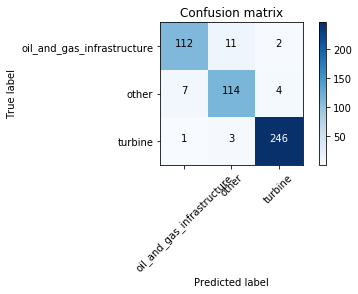

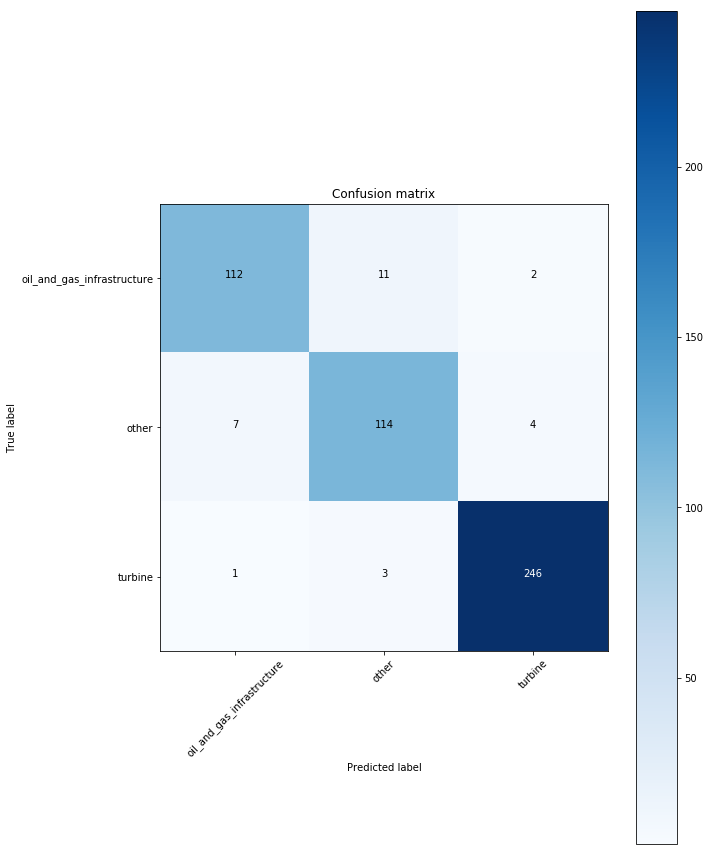

In [164]:
utils.plot_confusion_matrix(cm, sorted(list(validation_generator.class_indices)))

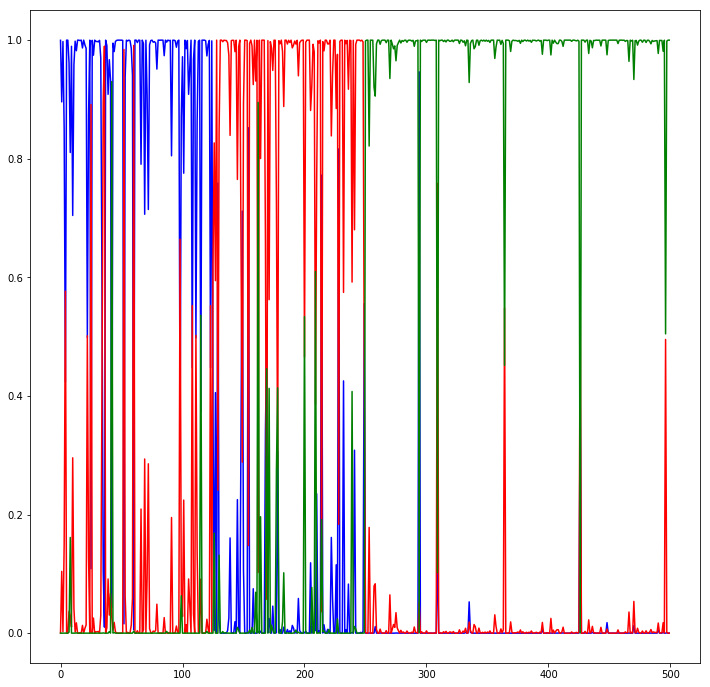

In [128]:
plt.figure(figsize=(12,12))
plt.plot(preds[:,0], 'b')
plt.plot(preds[:,1], 'r')
plt.plot(preds[:,2], 'g')
plt.show()

In [131]:
preds[498]

array([  1.15440719e-06,   5.50914701e-05,   9.99943733e-01], dtype=float32)

## changing model to deal with overfitting - batchnorm? 


In [168]:
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

model_batchnorm = Model(outputs=x, inputs=classifier_input)
model_batchnorm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [169]:
model_batchnorm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 64)        36928     
__________

In [176]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 16s - loss: 0.0212 - acc: 0.9935 - val_loss: 3.4588 - val_acc: 0.7333
Epoch 2/2
100/100 [==============================] - 16s - loss: 0.0139 - acc: 0.9960 - val_loss: 1.1517 - val_acc: 0.8817


## move position of batchnorm? need to split the activation from the conv layer first

In [180]:
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation=None, padding='same')(classifier_input)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = Activation('relu')(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

model_split_activation = Model(outputs=x, inputs=classifier_input)
model_split_activation.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [184]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model_split_activation.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 10s - loss: 0.0946 - acc: 0.9635 - val_loss: 0.1559 - val_acc: 0.9450
Epoch 2/2
100/100 [==============================] - 10s - loss: 0.0922 - acc: 0.9695 - val_loss: 0.1835 - val_acc: 0.9283


In [185]:
# add the batchnorm before the activation. (need dense layers mid way? )

x = Conv2D(32, (3, 3), activation=None, padding='same')(classifier_input)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

model_split_activation_batchnorm = Model(outputs=x, inputs=classifier_input)
model_split_activation_batchnorm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [187]:
model_split_activation_batchnorm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 25, 25, 64)        256       
__________

## validation accuracy is jumping around so we will try increasing the batch size

In [190]:
train_datagen2 = ImageDataGenerator(rescale=1./255)

test_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=40,
        class_mode='categorical', 
        color_mode='grayscale')

validation_generator2 = test_datagen2.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=20,
        class_mode='categorical',
        color_mode='grayscale')

Found 2000 images belonging to 3 classes.
Found 500 images belonging to 3 classes.


In [192]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model_split_activation_batchnorm.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator2,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 49s - loss: 0.0135 - acc: 0.9960 - val_loss: 0.3403 - val_acc: 0.9250
Epoch 2/2
100/100 [==============================] - 49s - loss: 0.0106 - acc: 0.9978 - val_loss: 0.6481 - val_acc: 0.8883


## changing model to include dropout 

In [194]:
classifier_input = Input(shape=input_shape)

p=0.6

x = Conv2D(32, (3, 3), activation=None, padding='same')(classifier_input)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = Dropout(p/4)(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = Dropout(p/2)(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = Dropout(p)(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

model_batchnorm_dropout = Model(outputs=x, inputs=classifier_input)
model_batchnorm_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model_batchnorm_dropout.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator2,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 53s - loss: 0.0192 - acc: 0.9943 - val_loss: 0.1034 - val_acc: 0.9817
Epoch 2/2


In [202]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model_batchnorm_dropout.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator2,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 53s - loss: 0.0205 - acc: 0.9930 - val_loss: 0.5197 - val_acc: 0.8908
Epoch 2/2
100/100 [==============================] - 53s - loss: 0.0179 - acc: 0.9940 - val_loss: 0.7212 - val_acc: 0.7925


## Finally data augmentation (on the best model = model_batchnorm_dropout)

In [ ]:
train_datagen_aug = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=90,
        horizontal_flip=True))

test_datagen_aug = ImageDataGenerator(rescale=1./255)

train_generator_aug = train_datagen_aug.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=40,
        class_mode='categorical', 
        color_mode='grayscale')

validation_generator_aug = test_datagen_aug.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=20,
        class_mode='categorical',
        color_mode='grayscale')